<a href="https://colab.research.google.com/github/Khyojae/2025.LLM/blob/main/0923_AE%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [3]:
 def forward(self,x):
  out = self.layer1(x)
  out = self.layer2(out)
  out = out.view(batch_size, -1)
  return out

In [4]:
import torch
import torch.nn as nn

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()

        # 첫 번째 레이어 블록
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),   # (16, 28, 28)
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(16, 32, 3, padding=1),  # (32, 28, 28)
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, 3, padding=1),  # (64, 28, 28)
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2)                # (64, 14, 14)
        )

        # 두 번째 레이어 블록
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),  # (128, 14, 14)
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2),               # (128, 7, 7)
            nn.Conv2d(128, 256, 3, padding=1),# (256, 7, 7)
            nn.ReLU()
        )

    # 데이터의 흐름을 정의하는 forward 함수
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x

In [5]:
 def forward(self,x):
    out = x.view(batch_size,256,7,7)
    out = self.layer1(out)
    out = self.layer2(out)
    return out

In [6]:
import torch
import torch.nn as nn

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()

        # 첫 번째 레이어 블록: 7x7 -> 14x14
        self.layer1 = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 3, 2, 1, 1), # (128, 14, 14)
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.ConvTranspose2d(128, 64, 3, 1, 1),    # (64, 14, 14)
            nn.ReLU(),
            nn.BatchNorm2d(64)
        )

        # 두 번째 레이어 블록: 14x14 -> 28x28
        self.layer2 = nn.Sequential(
            nn.ConvTranspose2d(64, 16, 3, 1, 1),     # (16, 14, 14)
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.ConvTranspose2d(16, 1, 3, 2, 1, 1),   # (1, 28, 28)
            nn.Sigmoid()  # 마지막 레이어는 Sigmoid 또는 Tanh를 주로 사용합니다.
        )

    # 데이터의 흐름을 정의하는 forward 함수
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x

In [7]:
mnist_train = dset.MNIST("./data/MNIST", train=True,
  transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./data/MNIST", train=False,
  transform=transforms.ToTensor(), target_transform=None, download=True)

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.77MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.19MB/s]


In [8]:
 batch_size = 100

 train_loader = torch.utils.data.DataLoader(mnist_train,
    batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)

 test_loader = torch.utils.data.DataLoader(mnist_test,
    batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [9]:
num_epoch = 10
Learning_rate = 0.0002

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder = Encoder().to(device)
decoder = Decoder().to(device)

parameters = itertools.chain(encoder.parameters(), decoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=  Learning_rate)

In [10]:
for i in range(1):
 for j,[image, label] in enumerate(test_loader):

    image = image.to(device)
    z = encoder(image)
    output = decoder(z)

    loss = loss_func(output,image)
 # if j % 10 == 0:
 # print(loss)
print("loss is", loss.cpu().item())

loss is 0.2371523529291153


torch.Size([100, 28, 28])


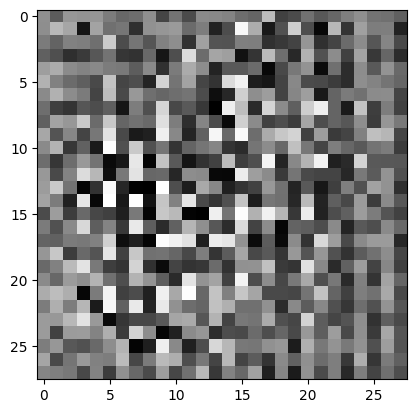

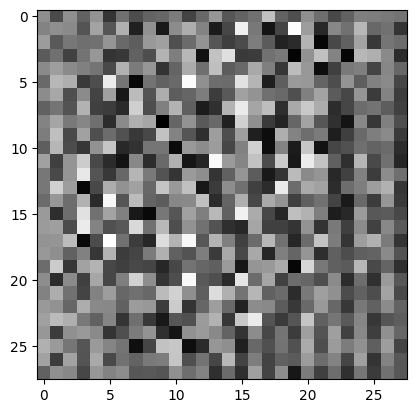

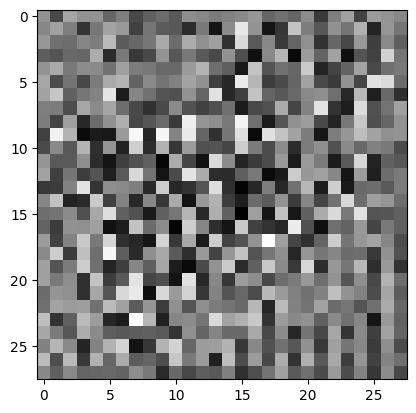

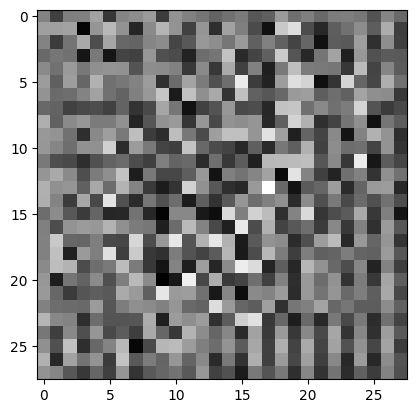

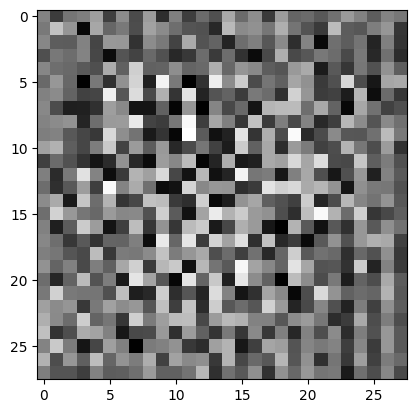

In [11]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(5):
  plt.show()
  plt.imshow(torch.squeeze(image[i].cpu()).data.numpy(),cmap='gray')
  plt.imshow(out_img[i].numpy(),cmap='gray')
  plt.show()

In [12]:
for i in range(num_epoch):
 for j,[image, label] in enumerate(train_loader):
  optimizer.zero_grad()

  image = image.to(device)
  z = encoder(image)
  output = decoder(z)
  loss = loss_func(output, image)

  loss.backward()
  optimizer.step()
print("loss is", loss.cpu().item())

loss is 0.0007774929981678724
